In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Unzipping a file

Unzip a file with a python script and getting data from it without actually unzipping it in your machine, saving disk space.

In [2]:
from zipfile import ZipFile

zip_folder = ZipFile('C:/Users/Javi/00_raw_data/developer_survey_2019.zip')
zip_folder.filelist
# We are only interested in the two "csv" files

[<ZipInfo filename='survey_results_public.csv' compress_type=deflate filemode='-rw-r--r--' external_attr=0x4000 file_size=196592730 compress_size=18282881>,
 <ZipInfo filename='survey_results_schema.csv' compress_type=deflate filemode='-rw-r--r--' external_attr=0x4000 file_size=9857 compress_size=3175>,
 <ZipInfo filename='so_survey_2019.pdf' compress_type=deflate filemode='-rw-r--r--' external_attr=0x4000 file_size=420746 compress_size=392450>,
 <ZipInfo filename='__MACOSX/' filemode='drwxrwxr-x' external_attr=0x4000>,
 <ZipInfo filename='__MACOSX/._so_survey_2019.pdf' compress_type=deflate filemode='-rw-r--r--' external_attr=0x4000 file_size=747 compress_size=510>,
 <ZipInfo filename='README_2019.txt' compress_type=deflate filemode='-rw-r--r--' external_attr=0x4000 file_size=2268 compress_size=1057>,
 <ZipInfo filename='__MACOSX/._README_2019.txt' compress_type=deflate filemode='-rw-r--r--' external_attr=0x4000 file_size=210 compress_size=109>]

In [3]:
csv_survey = zip_folder.open(zip_folder.filelist[0])
csv_schema = zip_folder.open(zip_folder.filelist[1])

df = pd.read_csv(csv_survey, index_col='Respondent')
schema_df = pd.read_csv(csv_schema, index_col='Column')

for csv in [csv_survey, csv_schema]:
    csv.close()
    
zip_folder.close()

In [4]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

## Basics & Filters

In [5]:
# Grab the columns
df.columns

# 'iloc' accesses row[s], column[s] by integer location 
df.iloc[[1, 4], 2]

# 'loc' accesses row[s], column[s] by labels
df.loc[1]

print(df.shape)
print(schema_df.shape)

(88883, 84)
(85, 1)


In [6]:
df.head()

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Int

In [7]:
schema_df.loc['LanguageWorkedWith', 'QuestionText']

'Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [8]:
schema_df.sort_index(inplace=True)
schema_df.loc['ConvertedComp', 'QuestionText']

'Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.'

In [9]:
spain_filt = (df['Country'] == 'Spain') & (df['LanguageWorkedWith'].str.contains('Python'))
us_filt = (df['Country'] == 'United States') & (df['LanguageWorkedWith'].str.contains('Python'))

In [10]:
spanish_df = df.loc[spain_filt, ['Country', 'LanguageWorkedWith', 'ConvertedComp']].dropna()
us_df = df.loc[us_filt, ['Country', 'LanguageWorkedWith', 'ConvertedComp']].dropna()
print(spanish_df.shape)
print(us_df.shape)

(447, 3)
(6913, 3)


In [11]:
spanish_df.head()

,Country,LanguageWorkedWith,ConvertedComp
Respondent,,,
326,Spain,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,21769.0
608,Spain,Bash/Shell/PowerShell;C;C++;Erlang;Go;HTML/CSS...,22915.0
768,Spain,Bash/Shell/PowerShell;C#;Go;HTML/CSS;JavaScrip...,51559.0
999,Spain,HTML/CSS;Java;JavaScript;Python;SQL,106250.0
1058,Spain,HTML/CSS;Java;JavaScript;PHP;Python;SQL,34372.0


In [12]:
print(np.mean(spanish_df['ConvertedComp']))
print(np.std(spanish_df['ConvertedComp']))
print()
print(np.median(spanish_df['ConvertedComp']))

97350.71364653244
163237.07578295004

40101.0


In [13]:
print(np.mean(us_df['ConvertedComp']))
print(np.std(us_df['ConvertedComp']))
print()
print(np.median(us_df['ConvertedComp']))

262330.77043251845
464155.7525254108

116000.0


In [14]:
spanish_df.describe()

,ConvertedComp
count,447.000000
mean,97350.713647
std,163419.974525
min,0.000000
25%,25206.000000
50%,40101.000000
75%,64162.000000
max,962424.000000


In [15]:
df['CurrencySymbol'].unique()

array([nan, 'THB', 'USD', 'UAH', 'CAD', 'NZD', 'INR', 'EUR', 'GBP', 'AUD',
       'RUB', 'BRL', 'ILS', 'ZAR', 'TRY', 'CHF', 'CZK', 'MYR', 'PLN',
       'SEK', 'CNY', 'ARS', 'PHP', 'PKR', 'AZN', 'HRK', 'KRW', 'BGN',
       'VND', 'IRR', 'HUF', 'HKD', 'AED', 'NGN', 'NOK', 'DKK', 'JPY',
       'XPF', 'MXN', 'EGP', 'MUR', 'UGX', 'SAR', 'SLL', 'NIO', 'SGD',
       'NPR', 'AMD', 'RON', 'AFN', 'BHD', 'MNT', 'CLP', 'GEL', 'KES',
       'DOP', 'BDT', 'CVE', 'RSD', 'BIF', 'LKR', 'IQD', 'COP', 'GTQ',
       'TWD', 'YER', 'IDR', 'BYN', 'LYD', 'AOA', 'ALL', 'LBP', 'KWD',
       'MDL', 'DZD', 'BAM', 'SYP', 'XOF', 'MAD', 'XAF', 'BND', 'MKD',
       'JOD', 'TTD', 'ZMW', 'CRC', 'GHS', 'PYG', 'MMK', 'PEN', 'UZS',
       'TND', 'HNL', 'QAR', 'RWF', 'KZT', 'TJS', 'UYU', 'TMT', 'TZS',
       'KGS', 'SDG', 'ANG', 'SOS', 'GNF', 'ETB', 'KHR', 'CUP', 'MRU',
       'BWP', 'BOB', 'ISK', 'DJF', 'VES', 'BZD', 'JMD', 'MVR', 'non',
       'WST', 'MZN', 'XDR', 'BBD', 'HTG', 'LSL', 'SZL', 'GYD', 'MGA',
       'FKP', '

In [16]:
df.columns

Index(['MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment',
       'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther',
       'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate',
       'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq',
       'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 

In [17]:
df.rename(columns={'ConvertedComp': 'SalaryUSD'}, inplace=True)

In [18]:
df.loc[:, 'SalaryUSD'].isnull().sum()

33060

## Exercises

**Sort values**

In [19]:
dfs = df.sort_values(by=['Country', 'SalaryUSD'], ascending=[True, False])

In [20]:
dfs[['Country', 'SalaryUSD']].dropna()

,Country,SalaryUSD
Respondent,,
63129,Afghanistan,1000000.0
50499,Afghanistan,153216.0
39258,Afghanistan,19152.0
58450,Afghanistan,17556.0
7085,Afghanistan,14364.0
...,...,...
35092,Zimbabwe,12000.0
84155,Zimbabwe,12000.0
30743,Zimbabwe,7800.0


**Top Values**

In [21]:
df['SalaryUSD'].nlargest(10)

Respondent
58      2000000.0
102     2000000.0
166     2000000.0
436     2000000.0
452     2000000.0
491     2000000.0
539     2000000.0
770     2000000.0
789     2000000.0
1232    2000000.0
Name: SalaryUSD, dtype: float64

In [22]:
df.nsmallest(5, 'SalaryUSD')

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,SalaryUSD,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
280,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",Taken an online course in programming or softw...,20 to 99 employees,"Developer, back-end;Developer, front-end;Devel...",25,12,22,Very satisfied,Very satisfied,NaN,NaN,NaN,I am not interested in new job opportunities,3-4 years ago,Interview with people in senior / management r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,USD,United States dollar,0.0,Yearly,0.0,50.0,There is a schedule and/or spec (made by me or...,Distracting work environment;Meetings;Not enou...,"Less than half the time, but at least one day ...",Office,Far above average,"Yes, because I see value in code review",8.0,"Yes, it's part of our process",Developers typically have the most influence o...,I have a great deal of influence,C#;HTML/CSS;JavaScript;SQL;TypeScript,C#;TypeScript,Microsoft SQL Server,Microsoft SQL Server,Windows,Windows,Angular/Angular.js;ASP.NET,Angular/Angular.js;ASP.NET,.NET,.NET,Notepad++;Visual Studio;Visual Studio Code,Windows,I do not use containers,Non-currency applications of blockchain,NaN,No,SIGH,Yes,Facebook,In real life (in person),Username,2008,A few times per week,Find answers to specific questions;Learn how t...,1-2 times per week,Stack Overflow was much faster,11-30 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are",Neutral,Not applicable - I did not use Stack Overflow ...,NaN,47.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
293,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Netherlands,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,20 to 99 employees,"Developer, back-end;Developer, full-stack;Deve...",9,14,6,Very satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",3-4 years ago,Complete a take-home project;Interview with pe...,Yes,Financial performance or funding status of the...,I was preparing for a job search,EUR,European Euro,0.0,Monthly,0.0,40.0,There is a schedule and/or spec (made by me or...,Lack of support from management;Meetings;Toxic...,A few days each month,Office,A little above average,"Yes, because I see value in code review",2.0,"Yes, it's part of our process",Developers and management have nearly equal in...,I have some influence,HTML/CSS;Java;JavaScript;SQL,Go;Kotlin;TypeScript,Firebase;MongoDB;MySQL;Oracle;PostgreSQL;Redis,Firebase;MongoDB;Redis,Docker;Heroku;Linux;Raspberry Pi;WordPress,Android;Arduino;AWS;Kubernetes;Linux;Microsoft...,Spring,Express

## Groupping & Aggregating Data

>DataFrame.groupby()

>.agg()

In [23]:
df.groupby(['Country'])['SocialMedia'].value_counts(normalize=True).loc['Spain']

SocialMedia
WhatsApp                    0.339498
Twitter                     0.217966
YouTube                     0.118230
Reddit                      0.093131
Instagram                   0.084544
LinkedIn                    0.056803
I don't use social media    0.045575
Facebook                    0.042933
VK ВКонта́кте               0.001321
Name: SocialMedia, dtype: float64

In [24]:
df.groupby(['Country'])['SalaryUSD'].median().loc['Ireland']

83640.0

In [25]:
df.groupby(['Country'])['LanguageWorkedWith'].apply(lambda x: x.str.contains('Python').value_counts(normalize=True)).loc['India']

False    0.648915
True     0.351085
Name: LanguageWorkedWith, dtype: float64

In [26]:
people_by_country = df['Country'].value_counts()

In [27]:
python_by_country = df.groupby(['Country'])['LanguageWorkedWith'].apply(lambda x: x.str.contains('Python').sum())

In [28]:
people_by_country

United States     20949
India              9061
Germany            5866
United Kingdom     5737
Canada             3395
                  ...  
Dominica              1
Niger                 1
North Korea           1
Timor-Leste           1
Chad                  1
Name: Country, Length: 179, dtype: int64

In [29]:
python_by_country

Country
Afghanistan                              8
Albania                                 23
Algeria                                 40
Andorra                                  0
Angola                                   2
                                        ..
Venezuela, Bolivarian Republic of...    28
Viet Nam                                78
Yemen                                    3
Zambia                                   4
Zimbabwe                                14
Name: LanguageWorkedWith, Length: 179, dtype: int64

In [30]:
df_python = pd.concat([people_by_country, python_by_country], axis='columns', sort=False)
df_python.columns = ['Devs', 'PythonDevs']

In [31]:
df_python['PyPercent'] = ((df_python['PythonDevs'] / df_python['Devs']) * 100).round(2)

In [32]:
df_python

,Devs,PythonDevs,PyPercent
United States,20949,10083,48.13
India,9061,3105,34.27
Germany,5866,2451,41.78
United Kingdom,5737,2384,41.55
Canada,3395,1558,45.89
...,...,...,...
Dominica,1,1,100.00
Niger,1,1,100.00
North Korea,1,0,0.00
Timor-Leste,1,1,100.00


In [33]:
dfa = df[(df['Age'] >= 15) & (df['Age'] < 75)]

In [39]:
df.groupby('Country')[]

<bound method Series.max of Country      SocialMedia             
Afghanistan  Facebook                    11
             YouTube                      3
             I don't use social media     2
             WhatsApp                     2
             Instagram                    1
                                         ..
Zimbabwe     YouTube                      3
             Facebook                     2
             Instagram                    2
             LinkedIn                     1
             Reddit                       1
Name: SocialMedia, Length: 1135, dtype: int64>

## Pivot Table

In [26]:
df.dropna(axis='index', subset=['Age'])

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Int

In [39]:
(
df
.pivot_table(index='Country', columns='Hobbyist', values='ConvertedComp', aggfunc='mean')
.sort_values(by='Yes', ascending=False)
.head(10)
)

Hobbyist,No,Yes
Country,,
Liechtenstein,NaN,811188.000000
San Marino,NaN,301788.000000
Ireland,203346.151515,261539.862816
United States,254191.459621,248299.510033
Swaziland,NaN,242607.500000
Timor-Leste,NaN,229500.000000
Republic of Korea,207758.833333,202476.909091
Norway,176243.266667,183313.857542
Switzerland,166096.271930,174019.767025


In [51]:
ages = pd.cut(df['Age'], bins=[0,18,25,30,40,65,np.inf], labels=['Minor', 'Early 20s', 'Late 20s', '30s', 'Adult', 'Retired'])
ages

Respondent
1            Minor
2        Early 20s
3         Late 20s
4        Early 20s
5         Late 20s
           ...    
88377          NaN
88601          NaN
88802          NaN
88816          NaN
88863        Minor
Name: Age, Length: 88883, dtype: category
Categories (6, object): [Minor < Early 20s < Late 20s < 30s < Adult < Retired]

In [50]:
ages.value_counts()

Early 20s    22935
30s          22050
Late 20s     21250
Adult         9297
Minor         3359
Retired        319
Name: Age, dtype: int64

In [74]:
salary_by_ages = df.groupby(ages)['ConvertedComp'].agg('mean').sort_values(ascending=True)
salary_by_ages

Age
Minor         49390.338983
Early 20s     85429.711061
Late 20s     115357.117337
30s          148583.440865
Adult        179642.695115
Retired      194758.179104
Name: ConvertedComp, dtype: float64

In [75]:
import seaborn as sns

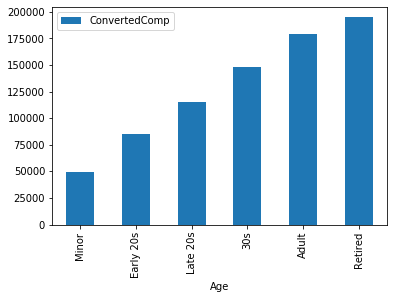

In [78]:
salary_by_ages.reset_index().plot.bar(x='Age', y='ConvertedComp')

# Dates & Time Series

In [55]:
equity = pd.read_csv('https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Pandas/10-Datetime-Timeseries/ETH_1h.csv')
print(equity.shape)
equity.head()

(23674, 7)


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [56]:
equity['Date'] = pd.to_datetime(equity['Date'], format='%Y-%m-%d %I-%p')

In [57]:
equity

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [58]:
equity.loc[1, 'Date'].day_name()

'Friday'

In [59]:
equity['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [60]:
equity['Week_day'] = equity['Date'].dt.day_name()
equity['Month'] = equity['Date'].dt.month_name()

In [61]:
equity['Date'].max() - equity['Date'].min()

Timedelta('986 days 09:00:00')

In [29]:
filt = (equity['Date'] >= '2019') & (equity['Date'] < '2020')
equity.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,Week_day,Month
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday,December
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday,December
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday,December
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday,December
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday,December
...,...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday,January
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday,January
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday,January
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday,January


In [62]:
equity.set_index('Date', inplace=True)

In [63]:
stock = equity.resample('W').agg({'High': 'max', 'Low': 'min', 'Close': 'mean' ,'Volume': 'sum'})

In [64]:
stock.reset_index(inplace=True)
stock

,Date,High,Low,Close,Volume
0,2017-07-02,293.73,253.23,268.202162,8.084631e+07
1,2017-07-09,285.00,231.25,261.062083,2.246746e+08
2,2017-07-16,240.33,130.26,195.698393,5.017750e+08
3,2017-07-23,249.40,153.25,212.783750,7.221637e+08
4,2017-07-30,229.99,178.03,203.309524,2.657305e+08
...,...,...,...,...,...
137,2020-02-16,290.00,216.31,255.198452,3.912867e+08
138,2020-02-23,287.13,242.36,265.321905,3.067838e+08
139,2020-03-01,278.13,209.26,236.373988,3.693920e+08
140,2020-03-08,253.01,196.00,229.817619,2.736569e+08


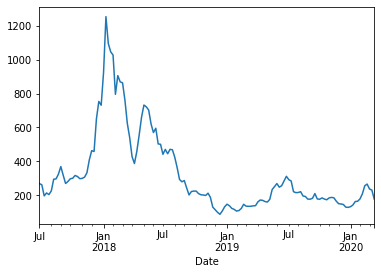

In [72]:
stock.set_index('Date')['Close'].plot()